<a href="https://colab.research.google.com/github/cmolinara-eng/Transferencia-de-Calor-con-Python-y-Matlab/blob/main/Elementos_B%C3%A1sicos_De_Transferencia_De_Calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elementos básicos de transferencia de calor.


## Ejemplo 4.1

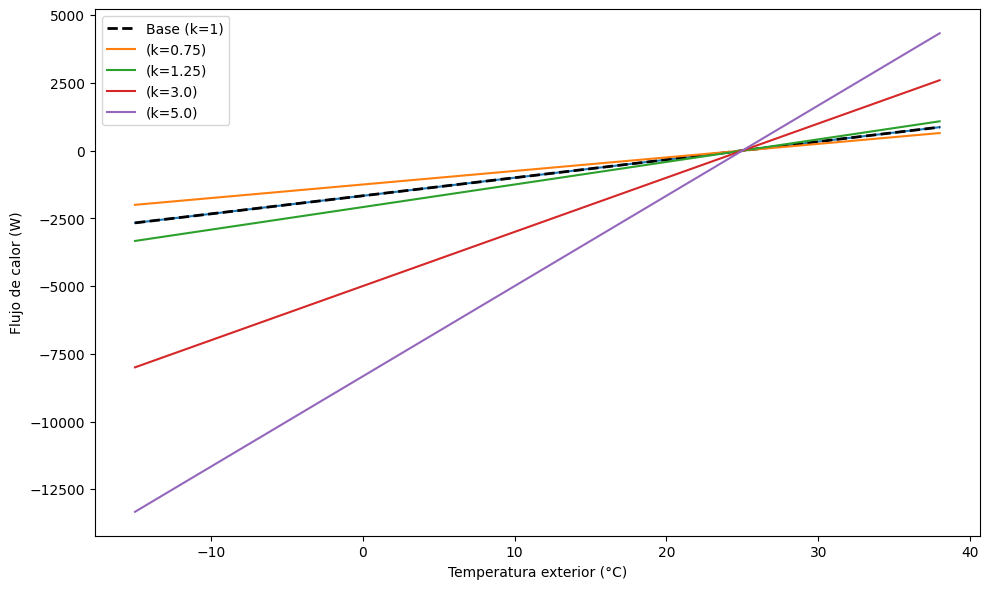

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------

A_s = 20        # Área superficial [m^2]
esp = 0.30      # Espesor del muro [m]
T_in = 25 + 273.15   # Temperatura interior [K]
k = 1           # Conductividad térmica [W/m·K]

# Rango de temperaturas exteriores (invierno a verano)
T_inv = -15 + 273.15  # Temperatura exterior en invierno [K]
T_ver = 38 + 273.15   # Temperatura exterior en verano [K]


# ----------------------------------------------------------
# Punto a
# ----------------------------------------------------------


# Temperaturas exteriores: 100 puntos entre invierno y verano
T_ev = np.linspace(T_inv, T_ver, 100)

# Cálculo del flujo de calor
Q_a = - A_s * k * (T_in - T_ev) / esp  # [W]

# Gráfico del flujo de calor frente a temperatura exterior

plt.figure(figsize=(10, 6))
plt.plot(T_ev - 273.15, Q_a)
plt.plot(T_ev -273.15, Q_a, label=f'Base (k={k})', linewidth=2, linestyle='--', color='black')


# ----------------------------------------------------------
# Punto b
# ----------------------------------------------------------

k_materiales = np.array([0.75, 1.25, 3.0, 5])# Definir las conductividades

for k in k_materiales: # Repetición del punto a para cada conductividad
    Q_b = - A_s * k * (T_in - T_ev) / esp
    plt.plot(T_ev - 273.15, Q_b, label=f'(k={k})')

# Grafico

plt.xlabel("Temperatura exterior (°C)")
plt.ylabel("Flujo de calor (W)")
#plt.title("Flujo de calor en función de la temperatura exterior")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

## Ejemplo 4.2

C = 12.7393
n = 0.6914
R^2 = 0.9969


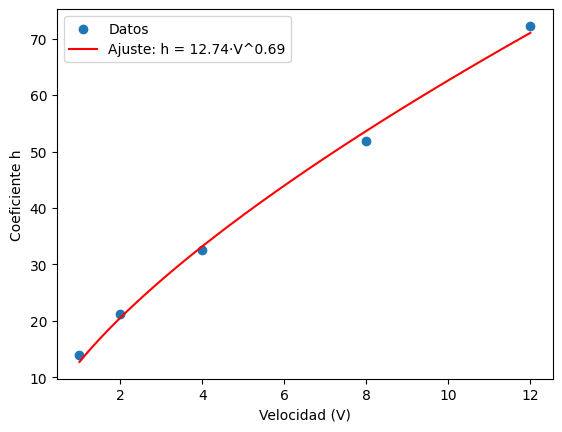

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------

T_inf = 45 + 273.15 # Temperatura del Aire [°C]
T_s= 280 + 273.15 # Temperatura superficial [°C]
V = np.array([1, 2, 4, 8, 12]) # Velocidades [m/s]
D = 30e-3 # Diametro [m]
Q = np.array([310, 470, 720, 1150, 1600]) # Potencia disipada por metro [W/m]

# ----------------------------------------------------------
# Punto a
# ----------------------------------------------------------
h = Q / (np.pi * D * (T_s - T_inf)) # array de coeficientes convectivos [W/m^2 K]

# ----------------------------------------------------------
# Punto B
# ----------------------------------------------------------

# Función modelo
def modelo(V, C, n):
    return C * V**n

# Ajuste con curve_fit
params, covariance = curve_fit(modelo, V, h, p0=[1, 1])  # p0 son los valores iniciales
C, n = params
print(f"C = {C:.4f}")
print(f"n = {n:.4f}")

# Calcular el R^2
residuos = h - modelo(V, C, n) # Comparación (experimental- ajuste )
ss_res = np.sum(residuos**2)
ss_tot = np.sum((h - np.mean(h))**2)
r_sq = 1 - (ss_res / ss_tot)
print(f"R^2 = {r_sq:.4f}")

# Gráfico
V_fit = np.linspace(min(V), max(V), 100) # 100 datos en el rango del modelo.
h_fit = modelo(V_fit, C, n)

plt.scatter(V, h, label='Datos')
plt.plot(V_fit, h_fit, color='red', label=f'Ajuste: h = {C:.2f}·V^{n:.2f}')
plt.xlabel('Velocidad (V)')
plt.ylabel('Coeficiente h')
#plt.title(' h = C·Vⁿ ')
plt.legend()
plt.grid(False)
plt.show()

## Ejemplo 4.3

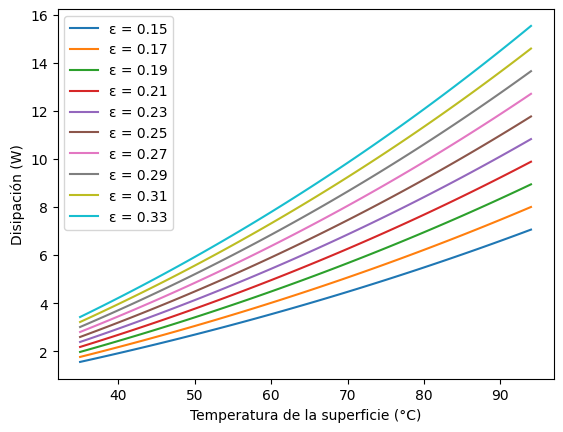

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------

D = 0.15  # Diámetro [m]
A = np.pi * D**2  # Área superficial de la esfera [m^2]
sigma = 5.67e-8  # Constante de Stefan-Boltzmann [W/m^2.K^4]
T_alr = 10+273.15  # Temperatura alrededor [K]

    # Temperaturas de la superficie
T_C = np.arange(35, 95, 1)  # [°C]
T_K = T_C + 273.15          # Conversión a [K]


# ----------------------------------------------------------
# Gráfica
# ----------------------------------------------------------
emisividades = np.arange(0.15, 0.35, 0.02)
plt.figure()
for eps in emisividades:
    Q = eps * sigma * A * (T_K**4 - T_alr**4)  # [W]
    plt.plot(T_C, Q, label=f"ε = {eps:.2f}")

plt.xlabel("Temperatura de la superficie (°C)")
plt.ylabel("Disipación (W)")
#plt.title("Disipación de calor para diferentes ε")
plt.legend(loc="upper left")
plt.grid(False)
plt.show()




# Ejemplo 4.4.

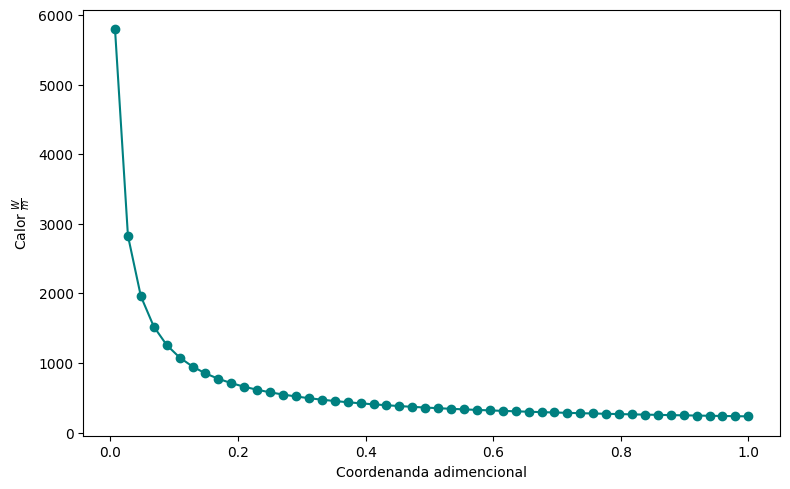

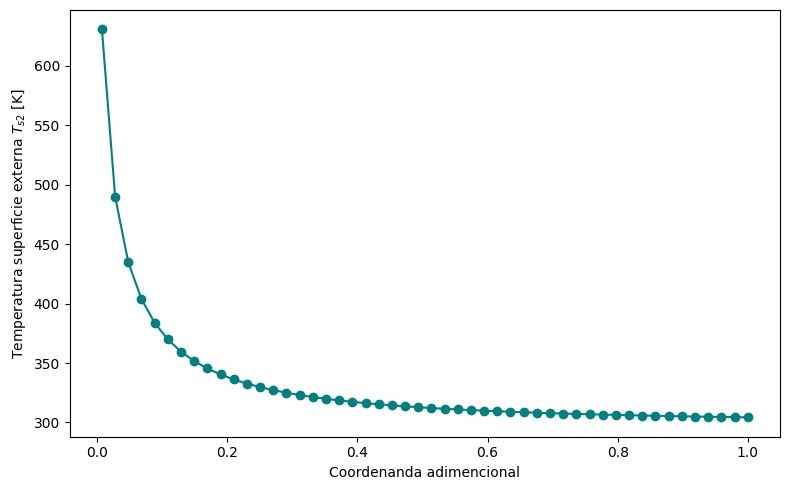

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------

h = 25  # [W/m^2 K]
T_inf = 25 + 273.15  # [K]
T_alr = 25 + 273.15  # [K]
T_s_int = 800  # [K]
e = 0.8  # Emisividad
r1 = 0.12 / 2  # [m]
boltz = 5.67e-8  # [W/m^2 K^4]
esp_max = 0.14  # [m]
k = 0.09 # [W/m K]

# ----------------------------------------------------------
# Función
# ----------------------------------------------------------
def minfunc(T_s2, esp):
  r2 = r1 + esp
  # términos por unidad de área exterior (W/m^2)
  q_conv = h * (T_s2 - T_inf)                            # W/m^2
  q_rad  = e * boltz * (T_s2**4 - T_alr**4)           # W/m^2
  q_cond = k * (T_s_int - T_s2) / (r2 * np.log(r2 / r1)) # W/m^2
  return q_conv + q_rad - q_cond

# Vector de espesores
espesores = np.linspace(0.001, esp_max, 50)
T2_valores = np.empty(len(espesores))

# ----------------------------------------------------------
# Método Numérico
# ----------------------------------------------------------
for j, esp in enumerate(espesores):
    if  j == 0:
        v_in = T_s_int - 400
    else:
      v_in = T2_valores[j-1]
    T2 = fsolve(lambda T: minfunc(T, esp), v_in)[0]
    T2_valores[j] = T2

# Cálculo de calor
q_cond = (k * 2 * np.pi * (T_s_int - T2_valores )) / (np.log((r1 + espesores) / r1)) # W/m

cordendada_ad = (espesores)/(esp_max)

# ----------------------------------------------------------
# Gráficos
# ----------------------------------------------------------

plt.figure(figsize=(8, 5))
plt.plot(cordendada_ad, q_cond, marker='o', color='teal', linestyle='-')
#plt.title("Calor vs. Espesor del aislamiento")
plt.xlabel("Coordenanda adimencional")
plt.ylabel("Calor $\\frac{W}{m}$ ")
plt.grid(False)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(cordendada_ad, T2_valores, marker='o', color='teal', linestyle='-')
#plt.title("Temperatura de la superficie externa vs. Espesor del aislamiento")
plt.xlabel("Coordenanda adimencional")
plt.ylabel("Temperatura superficie externa $T_{s2}$ [K]")
plt.grid(False)
plt.tight_layout()
plt.show()

## Ejemplo 4.5.

Calor transmitido Qx = 16.0 W
Temperatura en x = 0.5 m: T = 443.59 K


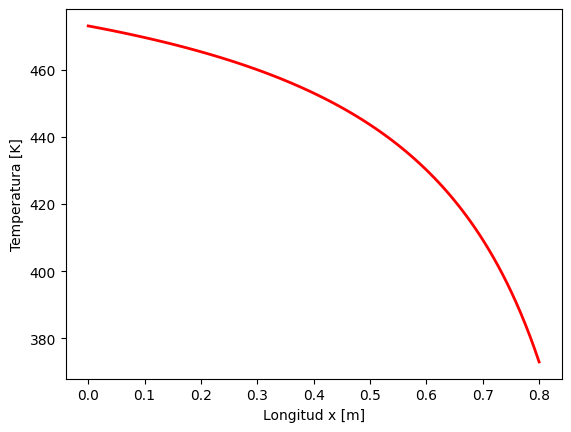

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------
K = 16.3     # Conductividad [W/(m*K)]
T1 = 473     # [K]
T2 = 373     # [K]
L = 0.80     # Longitud [m]
x1 = 0
x2 = L

# Radios
r1 = 0.10    # [m]
r2 = 0.025   # [m]

# Coeficientes del radio lineal r(x) = m*x + b
m = (r2 - r1) / L
b = r1

# ----------------------------------------------------------
# Calor y temperatura en  x = 0.5 m
# ----------------------------------------------------------
n = -m * np.pi * K * (T2 - T1)
d = (1 / (m * x1 + b)) - (1 / (m * x2 + b))
Qx = n / d   # Resultado en [W]

x_eval = 0.50
term1 = (1 / (m * L + b)) - (1 / b)
term2 = (1 / (m * x_eval + b)) - (1 / b)
T = ((T2 - T1) / term1) * term2 + T1  # [K]

# ----------------------------------------------------------
# Perfil de temperatura
# ----------------------------------------------------------
x_vals = np.linspace(0, L, 100)
T_vals = ((T2 - T1) / ((1 / (m * L + b)) - (1 / b))) * ((1 / (m * x_vals + b)) - (1 / b)) + T1

# ----------------------------------------------------------
# Resultados y Gráfica
# ----------------------------------------------------------
print(f"Calor transmitido Qx = {Qx:.1f} W")
print(f"Temperatura en x = 0.5 m: T = {T:.2f} K")

# Gráfica
plt.figure()
plt.plot(x_vals, T_vals, 'r', linewidth=2)
plt.xlabel("Longitud x [m]")
plt.ylabel("Temperatura [K]")
#plt.title("Perfil de temperatura")
plt.grid(False)
plt.show()

## Ejemplo 4.6.


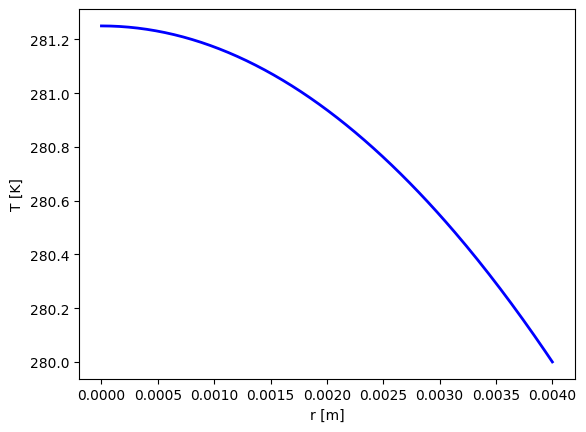

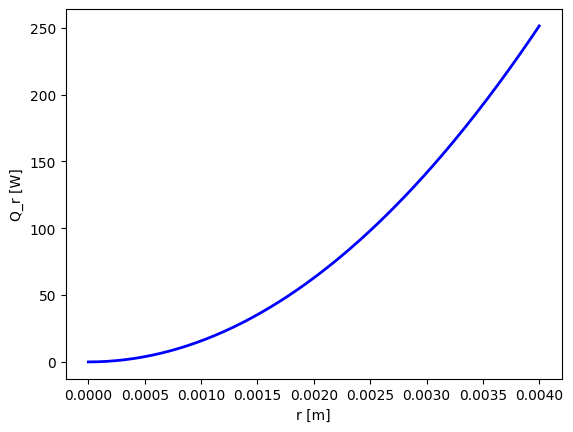

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------

R = 0.004        # Radio del cilindro [m]
k = 16           # Conductividad [W/m*K]
Phi = 5e6        # Generación de calor volumétrica [W/m^3]
T_s = 280        # Temperatura en la superficie [K]
h = 1            # Altura del cilindro [m]
# Vector de radios
r = np.linspace(0, R, 200)
# ----------------------------------------------------------
# Aplicación de las ecuaciones
# ----------------------------------------------------------

# Perfil de temperatura
T_r = T_s + (Phi * R**2 / (4 * k)) * (1 - (r / R)**2)

# Flujo de calor
q_r = np.pi * h * Phi * r**2

# ----------------------------------------------------------
# Gráficos
# ----------------------------------------------------------
plt.figure()
plt.plot(r, T_r, 'b', linewidth=2)
plt.xlabel("r [m]")
plt.ylabel("T [K]")
#plt.title("Perfil de temperatura")
plt.grid(False)
plt.show()


# Gráfica: Flujo de calor radial
plt.figure()
plt.plot(r, q_r, 'b', linewidth=2)
plt.xlabel("r [m]")
plt.ylabel("Q_r [W]")
#plt.title("Flujo de calor radial")
plt.grid(False)
plt.show()

# Ejemplo 4.7.

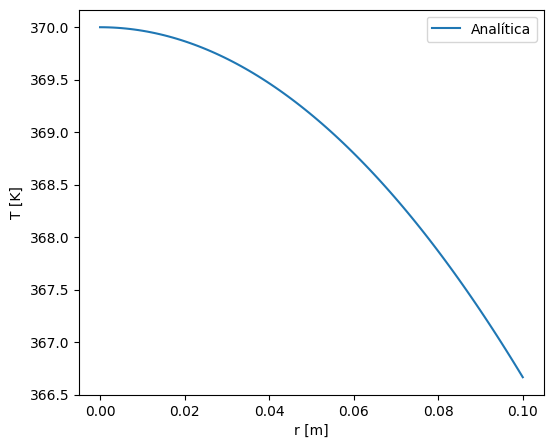

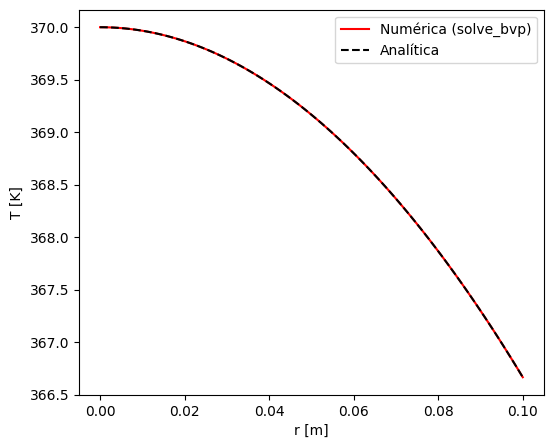

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp


# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------
R =0.1  # Radio de la esfera [m]
Gen = 5e4  # [w/m^3]
k = 25     # [w/mk]
T_inf= 350 # [K]
h = 100    # [w/K m^2]

# ----------------------------------------------------------
# Cálculo análitico
# ----------------------------------------------------------

def PerfilT_sp_cond_conv(r):
  #Definimos la ecuación para el perfil de temperatura resuelto de forma analítica
  return T_inf + Gen*(R**2 - r**2)/(6*k) + Gen*R/(3*h)


radios= np.linspace(0,R,100) # Array de radios dentro de la esfera
T_eval = PerfilT_sp_cond_conv(radios) # Temperatura en cada radio evaluado



# Graficar resultado analitico
plt.figure(figsize=(6,5))
plt.plot(radios, T_eval, label="Analítica")
plt.xlabel("r [m]")
plt.ylabel("T [K]")
#plt.title("Perfil de temperatura en la esfera con generación y convección")
plt.legend()
plt.grid(False)
plt.show()


# ----------------------------------------------------------
# Solución numérica
# ----------------------------------------------------------

def ode(r, y): # Ecuación diferencial convertida a 1er grado

    T, dTdr = y
    dTdr_dr = -2/r * dTdr - Gen/k   # cuidado  con r=0
    return np.vstack((dTdr, dTdr_dr))


def bc(ya, yb):  #Condiciones de frontera igualadas a cero
    cf_cent = ya[1]             # simetría: dT/dr(0) = 0
    cf_sup = -k*yb[1] - h*(yb[0]-T_inf)  # convección en r=R
    return np.array([cf_cent, cf_sup])

r = np.linspace(1e-6, R, 100)  # valores independientes de radio
y_init = np.zeros((2, r.size)) + T_inf  # Valores iniciales de la temperatura y su derivada

sol = solve_bvp(ode, bc, r, y_init) # Solución numérica de la ecuación diferencial
T_num = sol.sol(radios)[0] # extracción de datos obtenidos


# ----------------------------------------------------------
# Gráfica comparativa.
# ----------------------------------------------------------

plt.figure(figsize=(6,5))
plt.plot(radios, T_num, 'r-', label="Numérica (solve_bvp)")
plt.plot(radios, T_eval, 'k--', label="Analítica")
plt.xlabel("r [m]"); plt.ylabel("T [K]")
plt.legend()
plt.grid(False)
#plt.title("Comparación: Analítica vs Numérica (solve_bvp)")


plt.show()

## Ejemplo 4.8.

--- Resultados ---

Sin aislamiento:
R_conv_i  = 1.4703e-02 K·m/W
R_cond    = 1.4091e-03 K·m/W
R_conv_o  = 7.1051e-01 K·m/W
R_total   = 0.73 K·m/W
q_sin     = 24.77 W/m

Con aislamiento de 12 mm:
R_cond_aislante = 0.25 K·m/W
R_conv_o_aislado = 0.50 K·m/W
R_total = 0.76 K·m/W
q_con   = 23.68 W/m

Radio crítico total (tubo + aislante): 0.0288 m (28.8 mm)
Espesor crítico del aislante: 0.0008 m (0.8 mm)



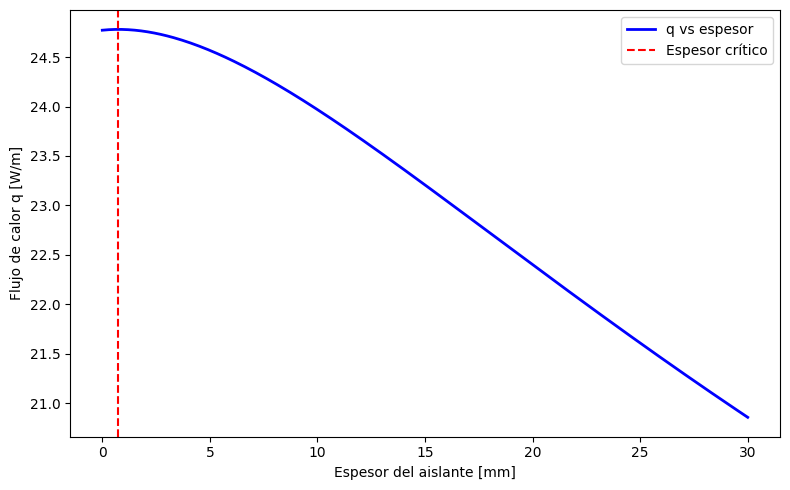

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# Parámetros del problema
# ----------------------------------------------------------
Di = 0.05          # [m]
e_tub = 0.003      # [m]
k_tub = 12.8        # [W/m·K]
k_aislante = 0.23   # [W/m·K]
h_i = 433           # [W/m²·K]
h_o = 8             # [W/m²·K]
T_i = 7             # [°C]
T_o = 25            # [°C]
e_aislante = 0.012  # [m]

# ----------------------------------------------------------
# Radios característicos
# ----------------------------------------------------------
r1 = Di / 2                      # Radio interior del tubo [m]
r2 = r1 + e_tub                  # Radio exterior del tubo [m]
r3 = r2 + e_aislante             # Radio exterior del aislante [m]

# ----------------------------------------------------------
# SIN AISLAMIENTO
# ----------------------------------------------------------
R_conv_i = 1 / (2 * np.pi * r1 * h_i)
R_cond_acero = np.log(r2 / r1) / (2 * np.pi * k_tub)
R_conv_o = 1 / (2 * np.pi * r2 * h_o)
R_total_sin = R_conv_i + R_cond_acero + R_conv_o

# Flujo de calor sin aislamiento
q_sin = (T_o - T_i) / R_total_sin

# ----------------------------------------------------------
# CON AISLAMIENTO
# ----------------------------------------------------------
R_cond_aislante = np.log(r3 / r2) / (2 * np.pi * k_aislante)
R_conv_o_aislado = 1 / (2 * np.pi * r3 * h_o)
R_total_con = R_conv_i + R_cond_acero + R_cond_aislante + R_conv_o_aislado
q_con = (T_o - T_i) / R_total_con

# ----------------------------------------------------------
# Radio y espesor críticos
# ----------------------------------------------------------
r_critico = k_aislante / h_o
espesor_critico = r_critico - r2

# ----------------------------------------------------------
# Resultados numéricos
# ----------------------------------------------------------
print('--- Resultados ---\n')
print('Sin aislamiento:')
print(f'R_conv_i  = {R_conv_i:.4e} K·m/W')
print(f'R_cond    = {R_cond_acero:.4e} K·m/W')
print(f'R_conv_o  = {R_conv_o:.4e} K·m/W')
print(f'R_total   = {R_total_sin:.2f} K·m/W')
print(f'q_sin     = {q_sin:.2f} W/m')

print('\nCon aislamiento de 12 mm:')
print(f'R_cond_aislante = {R_cond_aislante:.2f} K·m/W')
print(f'R_conv_o_aislado = {R_conv_o_aislado:.2f} K·m/W')
print(f'R_total = {R_total_con:.2f} K·m/W')
print(f'q_con   = {q_con:.2f} W/m')

print('\nRadio crítico total (tubo + aislante): {:.4f} m ({:.1f} mm)'.format(r_critico, r_critico*1000))
print('Espesor crítico del aislante: {:.4f} m ({:.1f} mm)\n'.format(espesor_critico, espesor_critico*1000))

# ----------------------------------------------------------
# Variación del flujo con el espesor del aislante
# ----------------------------------------------------------
espesores_m = np.linspace(0, 0.03, 300)  # 0 a 30 mm
q_vs_e = np.zeros_like(espesores_m)

for i, e_var in enumerate(espesores_m): # recorre valores y toma items de los mismos
    r3_var = r2 + e_var
    R_cond_aislante = np.log(r3_var / r2) / (2 * np.pi * k_aislante)
    R_conv_o_aislado = 1 / (2 * np.pi * r3_var * h_o)
    R_total_var = R_conv_i + R_cond_acero + R_cond_aislante + R_conv_o_aislado
    q_vs_e[i] = (T_o - T_i) / R_total_var

# ----------------------------------------------------------
# Gráfica
# ----------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(espesores_m * 1000, q_vs_e, 'b-', linewidth=2, label='q vs espesor')
plt.axvline(espesor_critico * 1000, color='r', linestyle='--', label='Espesor crítico')
plt.xlabel('Espesor del aislante [mm]')
plt.ylabel('Flujo de calor q [W/m]')
#plt.title('Espesor del aislamiento vs. flujo de calor')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

## Ejemplo 4.9.




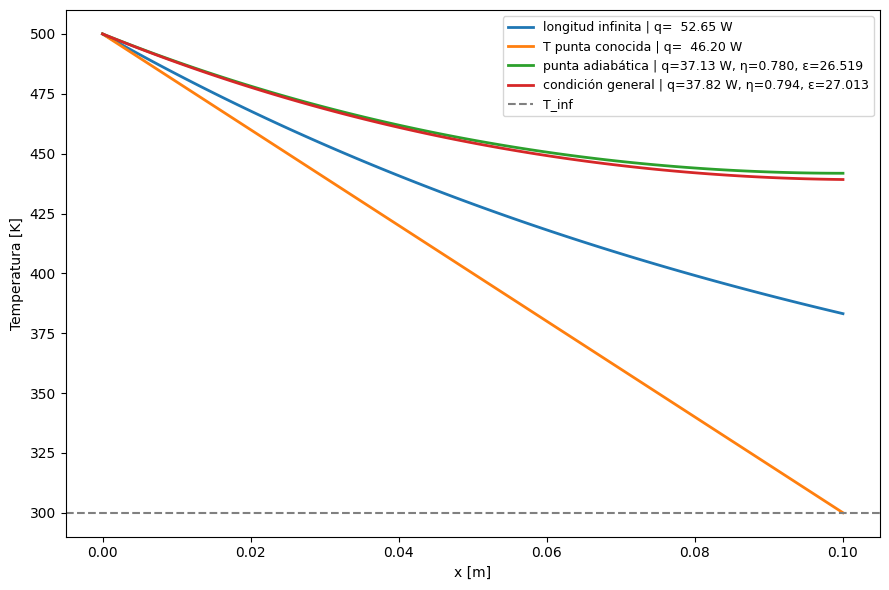

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass

# ----------------------------------------------------------
# Definición de datos
# ----------------------------------------------------------
# Se usan dataclasses para agrupar parámetros de la aleta y del fluido

@dataclass
class FinParams:
    P: float      # Perímetro expuesto al fluido [m]
    A_c: float    # Área de la sección transversal [m²]
    L: float      # Longitud total de la aleta [m]
    k: float      # Conductividad térmica [W/m·K]
    w: float      # Ancho de la base [m]
    t: float      # Espesor [m]
    D: float = 0.0  # Diámetro (solo si se usa forma cilíndrica, opcional)


@dataclass
class FluidParams:
    h: float      # Coeficiente de convección [W/m²·K]
    T_inf: float  # Temperatura del fluido [K]


# ----------------------------------------------------------
# Función principal de cálculo
# ----------------------------------------------------------
def superficies_q_th(Caso, Params_fin, params_fluid, T_b: float, X: float):
        #Caso          : string -> tipo de condición de punta
        #Params_fin    : FinParams -> propiedades de la aleta
        #params_fluid  : FluidParams -> propiedades del fluido
        #T_b           : temperatura en la base [K]
        #X             : posición a lo largo de la aleta [m]


    C = Caso.lower() # lleva a minúsculas

    # -----------------------------------------------------
    # Extracción de Parámetros de la aleta y fluido
    # -----------------------------------------------------
    P, A_c, L, k, t = Params_fin.P, Params_fin.A_c, Params_fin.L, Params_fin.k, Params_fin.t
    h, T_inf = params_fluid.h, params_fluid.T_inf

    # Diferencia de temperatura base-fluido
    theta_b = T_b - T_inf

    # Parámetro característico de la aleta
    m = np.sqrt(h * P / (k * A_c))

    # Parámetro M
    M = np.sqrt(h * P * k * A_c) * theta_b

      # ----------------------------------------------------------
      # Condicionales para cada caso
      # ----------------------------------------------------------
    if C == 'longitud infinita':
        # Aleta suficientemente larga: la temperatura en la punta -> T_inf
        q_f = M
        theta_ratio = np.exp(-m * X)
        caso_efectivo = "longitud infinita"

    elif C == 'tconocida':
        # Temperatura de la punta conocida
        q_f = h * P * L * theta_b
        theta_ratio = 1 - X / L
        caso_efectivo = "T punta conocida"

    elif C == 'adiabática':
        # Punta aislada
        q_f = M * np.tanh(m * L)
        theta_ratio = np.cosh(m * (L - X)) / np.cosh(m * L)
        caso_efectivo = "punta adiabática"

    elif C == 'general':
        # Condición mixta: convección en la punta
        q_f = M * (np.sinh(m*L) + (h/(m*k)) * np.cosh(m*L)) / \
                  (np.cosh(m*L) + (h/(m*k)) * np.sinh(m*L))
        theta_ratio = (np.cosh(m*(L-X)) + (h/(m*k)) * np.sinh(m*(L-X))) / \
                      (np.cosh(m*L) + (h/(m*k)) * np.sinh(m*L))
        caso_efectivo = "condición general"

    else:
        raise ValueError("Caso inválido — use: 'longitud infinita', 'tconocida', 'adiabática' o 'general'")

    # Temperatura local a lo largo de la aleta
    T_x = T_inf + theta_b * theta_ratio

    # ----------------------------------------------------------
    # Eficiencia y efectividad para las que aplica
    # ----------------------------------------------------------
    eta_A = None
    epsilon = None

    if C in ["adiabática", "general"]:
        # Área superficial total y de base
        A_s = P * L + A_c
        A_a = A_c
        # Eficiencia de la aleta
        eta_A = q_f / (h * A_s * theta_b)
        # Efectividad
        epsilon = q_f / (h * A_a * theta_b)

    # Retornar resultados
    return {
        "q_f": q_f,
        "Temperatura": T_x,
        "eta_A": eta_A,
        "epsilon": epsilon,
        "Caso_efectivo": caso_efectivo,
    }


# ----------------------------------------------------------
# Aplicación de la función principal
# ----------------------------------------------------------

# Parámetros de la aleta rectangular
params_fin = FinParams(
    P=0.066,     # perímetro [m]
    A_c=2e-4,    # área de sección [m²]
    L=0.1,       # longitud [m]
    k=150,       # conductividad [W/m·K]
    w=0.025,     # ancho base [m]
    t=0.008      # espesor [m]
)

# Propiedades del fluido
params_fluid = FluidParams(
    h=35,        # coef. convección [W/m²·K]
    T_inf=300    # temperatura del fluido [K]
)

# Lista de casos a comparar
casos = ["longitud infinita", "tconocida", "adiabática", "general"]

# Condiciones de simulación
L = params_fin.L
T_b = 500  # temperatura de la base [K]
X_vals = np.linspace(0, L, 100)  # discretización espacial

# ----------------------------------------------------------
# Cálculos y gráfica de distribución de temperatura
# ----------------------------------------------------------

plt.figure(figsize=(9, 6))

for caso in casos:
    T_x_list = []

    for X in X_vals:
        # Evaluar distribución para cada punto X
        res = superficies_q_th(
            caso, params_fin, params_fluid,
            T_b=T_b, X=X
        )
        T_x_list.append(res["Temperatura"])

    # Construir etiqueta según el tipo de caso
    if res["eta_A"] is not None:
        lbl = f"{res['Caso_efectivo']} | q={ res['q_f']:.2f} W, η={res['eta_A']:.3f}, ε={res['epsilon']:.3f}"
    else:
        lbl = f"{res['Caso_efectivo']} | q=  {res['q_f']:.2f} W"

    # Graficar perfil de temperatura
    plt.plot(X_vals, T_x_list, linewidth=2, label=lbl)

# Temperatura del fluido ambiente
plt.axhline(params_fluid.T_inf, color="gray", linestyle="--", label="T_inf")


plt.xlabel("x [m]")
plt.ylabel("Temperatura [K]")
#plt.title("Distribución de temperatura en la aleta rectangular")
plt.legend(fontsize=9)
plt.grid(False)
plt.tight_layout()
plt.show()
